# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [9]:
from sklearn.cluster import KMeans
KMeans=KMeans(n_clusters=3, random_state=0)
KMeans.fit(X)
y_pred = KMeans.predict(X)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_pred)


0.5711381937868838

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [13]:
#quiero entrenar el modelo con 5 clusters
KMeans=KMeans(n_clusters=5, random_state=0)
KMeans.fit(X)
y_pred = KMeans.predict(X)

#no entiendo porque no funciona

TypeError: 'KMeans' object is not callable

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [14]:
KMeans=KMeans(n_clusters=3, random_state=0)
KMeans.fit(X)
y_pred = KMeans.predict(X)

#no entiendo porque no funciona

TypeError: 'KMeans' object is not callable

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

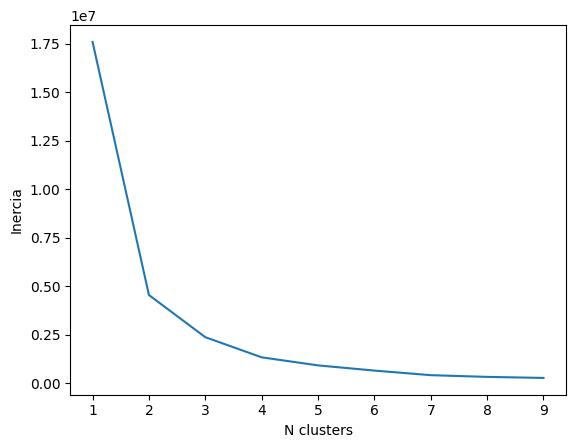

In [16]:
from sklearn import cluster, datasets

n_clusters, inercia = zip(*[(k, cluster.KMeans(n_clusters=k).fit(X).inertia_) for k in range(1, 10)])

n_clusters, inercia

fig=plt.figure()

ax=fig.add_subplot()

ax.plot(n_clusters, inercia)

plt.xlabel('N clusters')
plt.ylabel('Inercia');

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [28]:
%pip install yellowbrick


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 KB 5.2 MB/s eta 0:00:0000:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [29]:
from yellowbrick.cluster import KElbowVisualizer


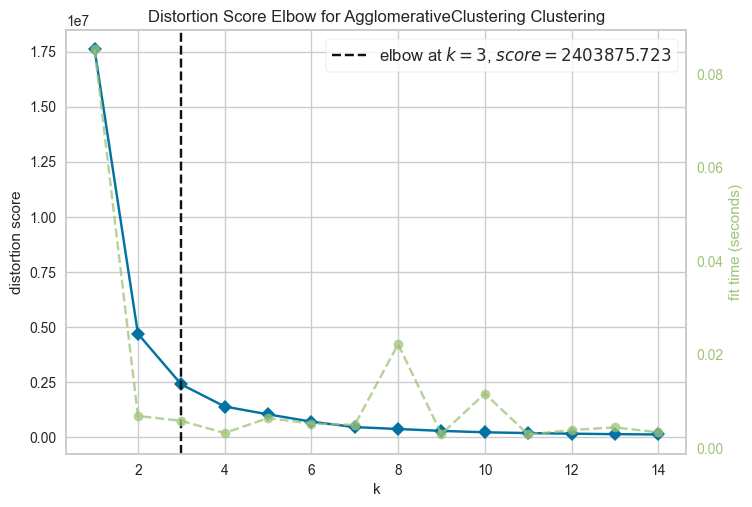

In [30]:
modelo=cluster.AgglomerativeClustering()

visual=KElbowVisualizer(modelo, k=(1, 15))

visual.fit(X)

visual.poof();

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [24]:
from sklearn.decomposition import PCA


In [33]:
aglo= cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
aglo.fit(X)
y_pred=aglo.labels_

silhouette_score(X, y_pred)



0.5644796401732068

In [35]:
X['cluster'] = KMeans.predict(X)


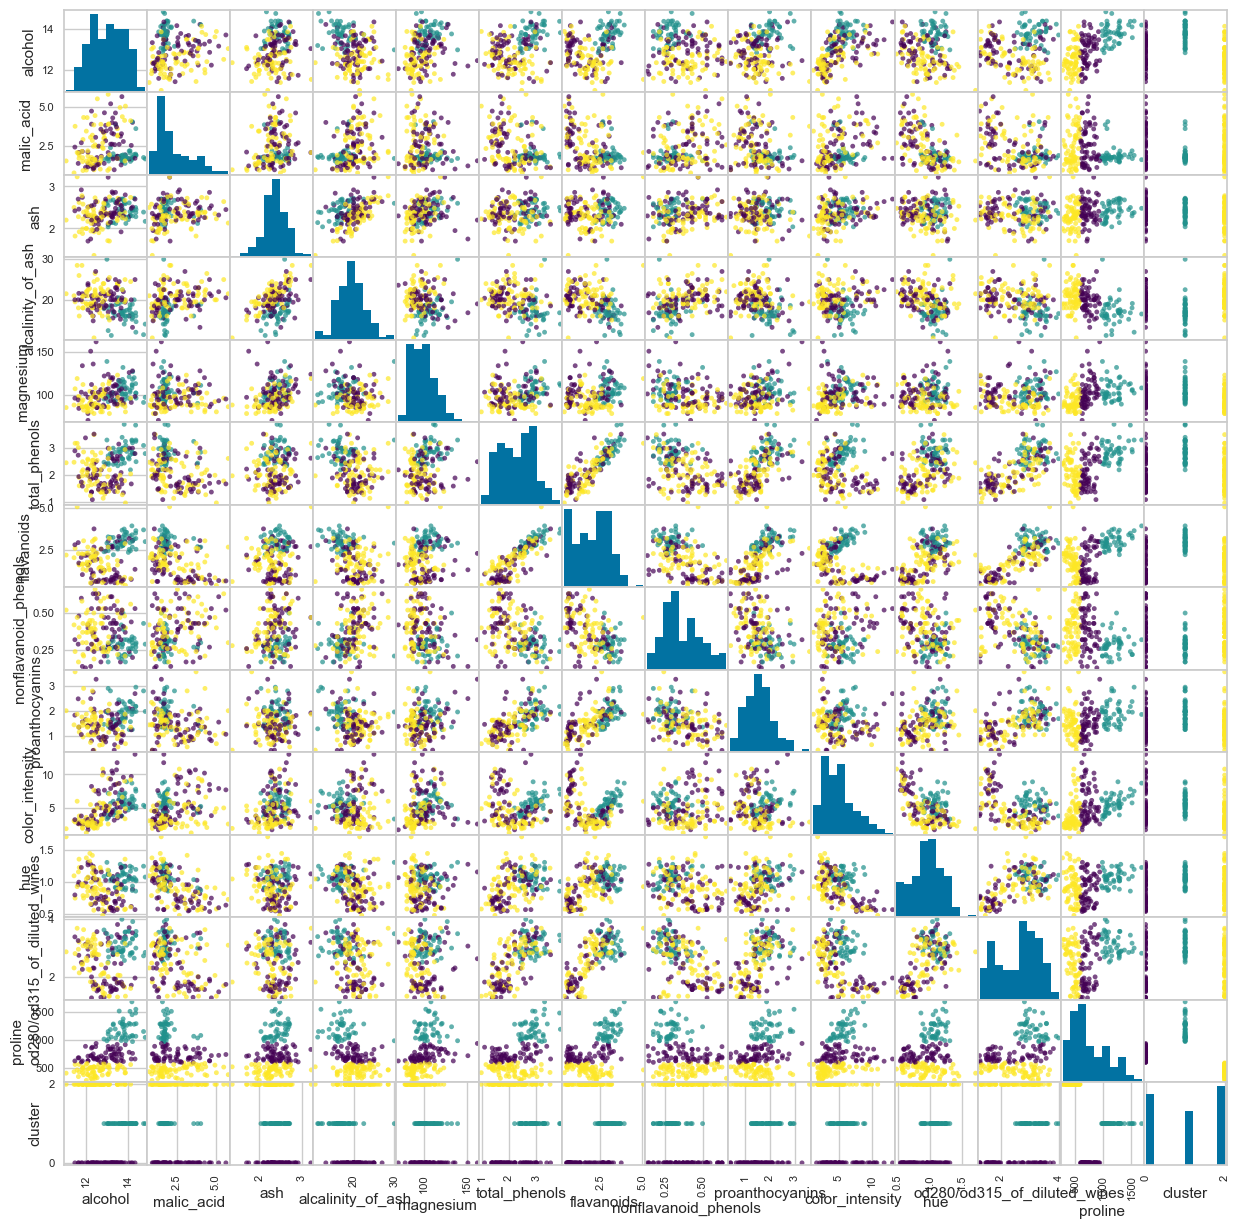

In [36]:
scatter_matrix = pd.plotting.scatter_matrix(X, figsize=(15,15), 
                                            diagonal='hist', 
                                            c=X['cluster'],
                                            cmap='viridis',
                                            alpha=0.7)
plt.show();


## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [38]:
from sklearn.decomposition import PCA
X.shape


(178, 14)

In [39]:
pca=PCA().fit(X)

pca_x=pca.transform(X)

len(pca_x)


178

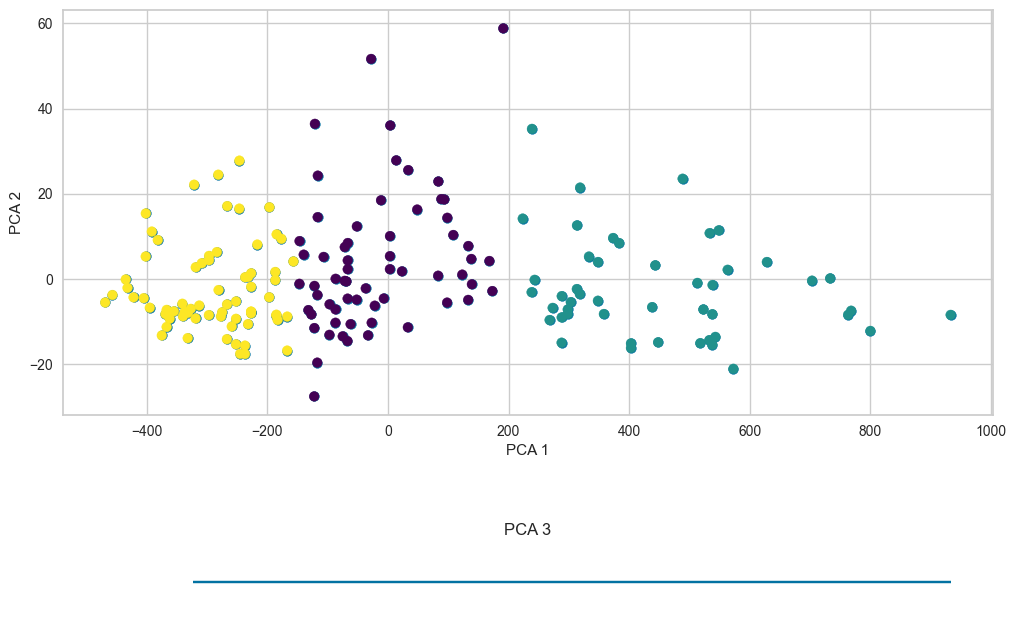

In [40]:
fig=plt.figure(figsize=(12, 8))

ax=[plt.subplot2grid((6, 1), (0, 0), rowspan=4),
    plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_x[:,0], pca_x[:,1])

ax[0].scatter(pca_x[:,0], pca_x[:,1], c=X['cluster'], cmap='viridis')


ax[0].set_xlabel('PCA 1')
ax[0].set_ylabel('PCA 2')

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)

y=np.ones(X.shape[0])

ax[1].plot(pca_x[:,2], y, '|', ms='20')
ax[1].axis('off')

plt.show();

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [ ]:
from sklearn.manifold import TSNE


NameError: name 'TSNE' is not defined